In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('student_result.csv')
df

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
0,64.91,71.25,86.56,88.94,12.94,1
1,46.49,68.39,49.37,67.19,6.94,1
2,69.29,86.32,78.82,52.84,2.47,0
3,94.69,94.01,58.49,89.27,2.25,1
4,43.71,81.64,63.46,67.11,6.04,0
...,...,...,...,...,...,...
49995,52.15,65.54,82.28,50.17,2.43,0
49996,49.78,59.46,72.31,77.10,12.58,0
49997,65.01,76.74,66.00,71.14,7.78,0
49998,58.19,65.79,71.61,81.37,2.11,0


In [3]:
df.shape[0]    #length of the dataset

50000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            50000 non-null  float64
 1   attendance_pct        50000 non-null  float64
 2   homework_pct          50000 non-null  float64
 3   midterm_score         50000 non-null  float64
 4   study_hours_per_week  50000 non-null  float64
 5   pass                  50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


In [5]:
df.isnull().sum()

student_id              0
attendance_pct          0
homework_pct            0
midterm_score           0
study_hours_per_week    0
pass                    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['pass'].value_counts()

pass
1    29070
0    20930
Name: count, dtype: int64

In [9]:
df.describe()   # there is no skewnwss if the value of mean and median varries within -0.5 to 0.5 

,student_id,attendance_pct,homework_pct,midterm_score,study_hours_per_week,pass
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,50.507849,69.007150,68.845039,68.824295,7.368583,0.581400
std,26.595208,16.108464,15.548843,13.623813,3.338321,0.493334
min,1.990000,32.970000,37.970000,43.980000,2.000000,0.000000
25%,30.810000,57.700000,57.600000,58.830000,4.830000,0.000000
50%,50.550000,69.590000,69.080000,68.740000,7.280000,1.000000
75%,70.142500,81.470000,80.570000,78.670000,9.710000,1.000000
max,99.010000,94.010000,95.010000,95.020000,15.000000,1.000000


student_id


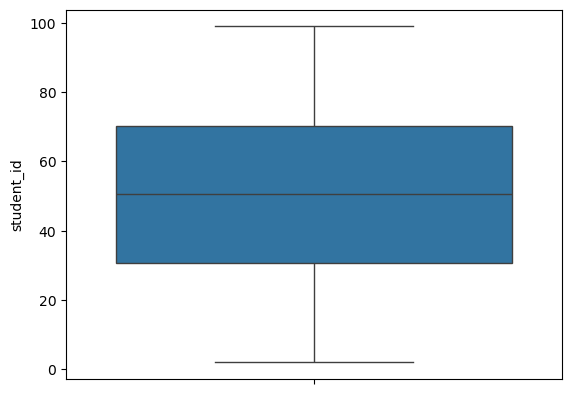

attendance_pct


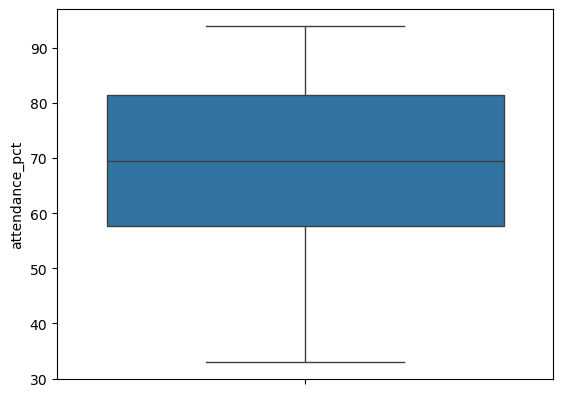

homework_pct


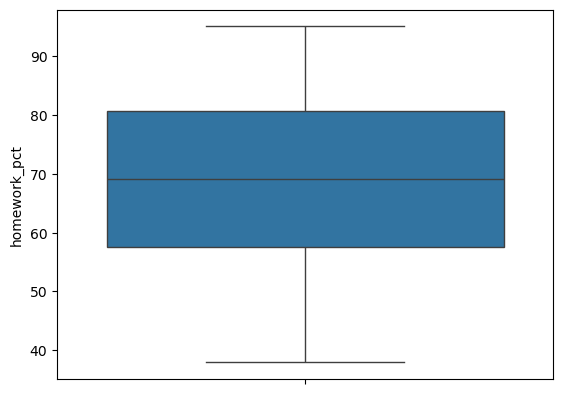

midterm_score


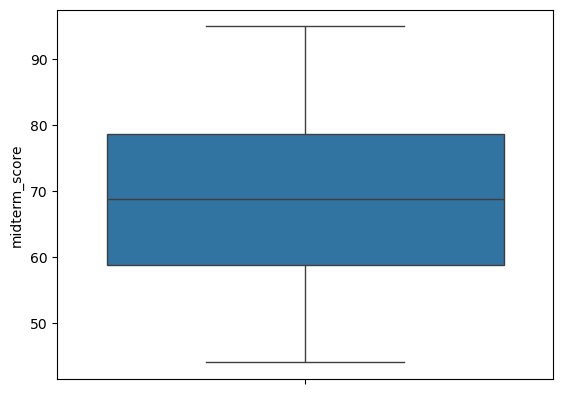

study_hours_per_week


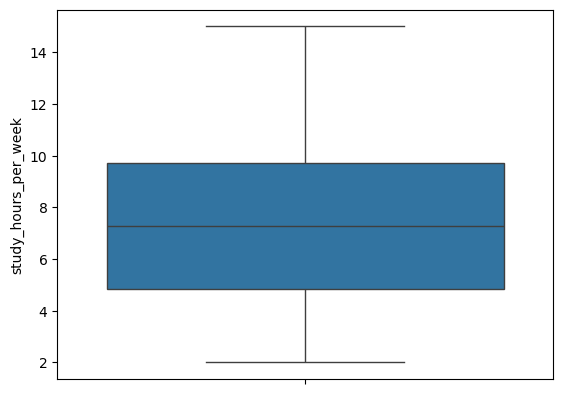

pass


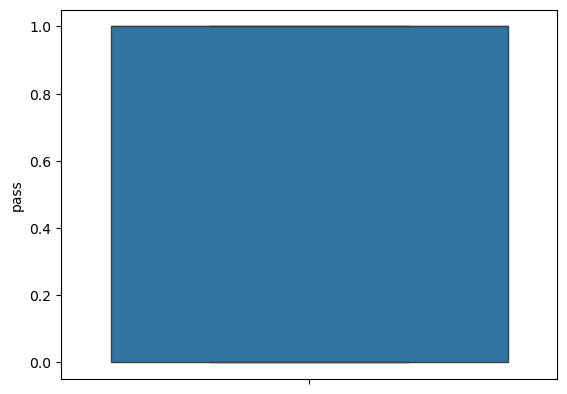

In [10]:
for i in df.columns:
    print(f"{i}")
    sns.boxplot(df[i])
    plt.show()

In [ ]:
from scipy.stats import skew 
for i in df.columns:
    print(f"{i} : {skew(df[i])}")

# there is no skewness as the range of all the skewness of the data is between -0.5 to 0.5 

student_id : 0.002227066189134704
attendance_pct : -0.2339951631547336
homework_pct : -0.1145257056042561
midterm_score : 0.03514353359074324
study_hours_per_week : 0.212611504415104
pass : -0.33000253408689517


In [15]:
features = df.drop(columns=["pass", "student_id"])
target = df["pass"]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size=0.25,random_state=1)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [18]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred_log = log_model.predict(x_test_scaled)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.5772
[[   0 5285]
 [   0 7215]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5285
           1       0.58      1.00      0.73      7215

    accuracy                           0.58     12500
   macro avg       0.29      0.50      0.37     12500
weighted avg       0.33      0.58      0.42     12500



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


0.57696
[[  16 5269]
 [  19 7196]]
              precision    recall  f1-score   support

           0       0.46      0.00      0.01      5285
           1       0.58      1.00      0.73      7215

    accuracy                           0.58     12500
   macro avg       0.52      0.50      0.37     12500
weighted avg       0.53      0.58      0.42     12500



In [24]:
pd.DataFrame({
    "Feature": features.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)


,Feature,Importance
0,attendance_pct,0.267139
2,midterm_score,0.258499
1,homework_pct,0.239671
3,study_hours_per_week,0.234691


In [ ]:
final_model = rf

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)